<a href="https://colab.research.google.com/github/clinewton/ML-Group-Final-Task/blob/main/Group%207%20-%20Task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model,metrics
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt
import io
import seaborn as sns
from matplotlib.colors import ListedColormap
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

#Step 1: Prepare the Dataset for Training


In [3]:
data = pd.read_csv('/content/Housing Pricing.csv') #this is the initial dataset

In [4]:
data.head() #this allows one to view the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 77)

#Step 2: Fill in the missing values.

In [6]:
data.drop('Id', axis=1,inplace=True) # Drops the Id feature

In [7]:
data.isna().any() #Finding the missing values

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [8]:
original_features=list(data.columns)
original_features #Shows a list of all the original features 

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

In [9]:
features_with_missing=list(data.columns[data.isna().any()])
features_with_missing
len(features_with_missing) #Shows the number of features with missing values

15

In [10]:
original_features=list(data.columns)
original_features
len(original_features) #Shows the number of original features

76

In [11]:
for feature in features_with_missing:
  print(feature,' ',(data[feature].isna().sum())/len(data)*100) #Shows the percentage of the missing feature

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [12]:
data.dropna(axis=1,thresh=0.5*(len(data)),inplace=True) #drops features with >=50% missing values

In [13]:
mean_fill=['LotFrontage', 'MasVnrArea'] #assigns the feature to the method of filling. This one is using the mean
bfill=['FireplaceQu'] #assigns the feature to the method of filling. This one is using backward filling
ffill=list(set(features_with_missing)-set(mean_fill)-set(bfill)) # assigns the feature to the method of filling. This one is using forward filling

In [14]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True) #fills the missing features using the mean

In [15]:
for feature in ffill:
  data[feature].fillna(method='ffill',inplace=True) #fills the missing features using forward fill

In [16]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True) #fills the missing features using backward fill

In [17]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

#Step 3: Encode the dataset (Assigning numbers to string data)

In [18]:
cat_data=data.select_dtypes(include=['object'])
cat_data.head(2) #This shows the categorical features (Features without numbers)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [19]:
cat_features=list(cat_data.columns)
cat_features #This shows the categorical features that need encoding.

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [20]:
nominal=['MSZoning', 'LandContour','LotConfig','Neighborhood']
ordinal=list(set(cat_features)-set(nominal))
numerical=list(set(original_features)-set(cat_features))
target=['SalePrice'] #Assigning the categorical feature to the 'encoding method'

In [21]:
data[nominal] #Viewing the nominal features

,MSZoning,LandContour,LotConfig,Neighborhood
0,RL,Lvl,Inside,CollgCr
1,RL,Lvl,FR2,Veenker
2,RL,Lvl,Inside,CollgCr
3,RL,Lvl,Corner,Crawfor
4,RL,Lvl,FR2,NoRidge
...,...,...,...,...
1455,RL,Lvl,Inside,Gilbert
1456,RL,Lvl,Inside,NWAmes
1457,RL,Lvl,Inside,Crawfor
1458,RL,Lvl,Inside,NAmes


In [22]:
data[numerical] #viewing the numerical features

,TotRmsAbvGrd,SalePrice,LowQualFinSF,BsmtFinSF1,YearBuilt,BsmtFinSF2,Fireplaces,GarageArea,MoSold,BsmtHalfBath,GarageCars,OpenPorchSF,1stFlrSF,OverallCond,EnclosedPorch,YrSold,TotalBsmtSF,MasVnrArea,HalfBath,BedroomAbvGr,BsmtUnfSF,MSSubClass,LotFrontage,FullBath,OverallQual,ScreenPorch,KitchenAbvGr,2ndFlrSF,WoodDeckSF,GarageYrBlt,GrLivArea,PoolArea,3SsnPorch,YearRemodAdd,BsmtFullBath,MiscVal,LotArea
0,8,208500,0,706,2003,0,0,548,2,0,2,61,856,5,0,2008,856,196.0,1,3,150,60,65.0,2,7,0,1,854,0,2003.0,1710,0,0,2003,1,0,8450
1,6,181500,0,978,1976,0,1,460,5,1,2,0,1262,8,0,2007,1262,0.0,0,3,284,20,80.0,2,6,0,1,0,298,1976.0,1262,0,0,1976,0,0,9600
2,6,223500,0,486,2001,0,1,608,9,0,2,42,920,5,0,2008,920,162.0,1,3,434,60,68.0,2,7,0,1,866,0,2001.0,1786,0,0,2002,1,0,11250
3,7,140000,0,216,1915,0,1,642,2,0,3,35,961,5,272,2006,756,0.0,0,3,540,70,60.0,1,7,0,1,756,0,1998.0,1717,0,0,1970,1,0,9550
4,9,250000,0,655,2000,0,1,836,12,0,3,84,1145,5,0,2008,1145,350.0,1,4,490,60,84.0,2,8,0,1,1053,192,2000.0,2198,0,0,2000,1,0,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,175000,0,0,1999,0,1,460,8,0,2,40,953,5,0,2007,953,0.0,1,3,953,60,62.0,2,6,0,1,694,0,1999.0,1647,0,0,2000,0,0,7917
1456,7,210000,0,790,1978,163,2,500,2,0,2,0,2073,6,0,2010,1542,119.0,0,3,589,20,85.0,2,6,0,1,0,349,1978.0,2073,0,0,1988,1,0,13175
1457,9,266500,0,275,1941,0,2,252,5,0,1,60,1188,9,0,2010,1152,0.0,0,4,877,70,66.0,2,7,0,1,1152,0,1941.0,2340,0,0,2006,0,2500,9042
1458,5,142125,0,49,1950,1029,0,240,4,0,1,0,1078,6,112,2010,1078,0.0,0,2,0,20,68.0,1,5,0,1,0,366,1950.0,1078,0,0,1996,1,0,9717


In [23]:
for feature in ordinal: 
  data[feature]=(data[feature].astype('category')).cat.codes 

In [24]:
df_nominal=pd.get_dummies(data[nominal])

In [25]:
df_ordinal=data[ordinal]

In [26]:
df_numerical=data[numerical]

In [27]:
encoded_data=pd.concat([df_numerical, df_nominal, df_ordinal], axis=1)

In [28]:
encoded_data.head(3)

,TotRmsAbvGrd,SalePrice,LowQualFinSF,BsmtFinSF1,YearBuilt,BsmtFinSF2,Fireplaces,GarageArea,MoSold,BsmtHalfBath,GarageCars,OpenPorchSF,1stFlrSF,OverallCond,EnclosedPorch,YrSold,TotalBsmtSF,MasVnrArea,HalfBath,BedroomAbvGr,BsmtUnfSF,MSSubClass,LotFrontage,FullBath,OverallQual,ScreenPorch,KitchenAbvGr,2ndFlrSF,WoodDeckSF,GarageYrBlt,GrLivArea,PoolArea,3SsnPorch,YearRemodAdd,BsmtFullBath,MiscVal,LotArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType,Electrical,BsmtExposure,Foundation,ExterQual,KitchenQual,Exterior1st,CentralAir,Exterior2nd,Street,BsmtFinType1,BsmtQual,SaleCondition,PavedDrive,BsmtCond,GarageFinish,LotShape,SaleType,ExterCond,BldgType,MasVnrType,GarageCond,Utilities,Heating,RoofMatl,LandSlope,FireplaceQu,Condition1,Functional,BsmtFinType2,Condition2,HouseStyle,GarageQual,RoofStyle,HeatingQC
0,8,208500,0,706,2003,0,0,548,2,0,2,61,856,5,0,2008,856,196.0,1,3,150,60,65.0,2,7,0,1,854,0,2003.0,1710,0,0,2003,1,0,8450,0,0,0,...,0,0,0,0,0,1,4,3,2,2,2,12,1,13,1,2,2,4,2,3,1,3,8,4,0,1,4,0,1,1,0,4,2,6,5,2,5,4,1,0
1,6,181500,0,978,1976,0,1,460,5,1,2,0,1262,8,0,2007,1262,0.0,0,3,284,20,80.0,2,6,0,1,0,298,1976.0,1262,0,0,1976,0,0,9600,0,0,0,...,0,0,0,0,1,1,4,1,1,3,3,8,1,8,1,0,2,4,2,3,1,3,8,4,0,2,4,0,1,1,0,4,1,6,5,2,2,4,1,0
2,6,223500,0,486,2001,0,1,608,9,0,2,42,920,5,0,2008,920,162.0,1,3,434,60,68.0,2,7,0,1,866,0,2001.0,1786,0,0,2002,1,0,11250,0,0,0,...,0,0,0,0,0,1,4,2,2,2,2,12,1,13,1,2,2,4,2,3,1,0,8,4,0,1,4,0,1,1,0,4,2,6,5,2,5,4,1,0


#Step 4: Standardize the dataset

In [29]:
X=encoded_data.drop('SalePrice', axis=1) 

In [30]:
y=data[target]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [31]:
X.to_numpy()
X

,TotRmsAbvGrd,LowQualFinSF,BsmtFinSF1,YearBuilt,BsmtFinSF2,Fireplaces,GarageArea,MoSold,BsmtHalfBath,GarageCars,OpenPorchSF,1stFlrSF,OverallCond,EnclosedPorch,YrSold,TotalBsmtSF,MasVnrArea,HalfBath,BedroomAbvGr,BsmtUnfSF,MSSubClass,LotFrontage,FullBath,OverallQual,ScreenPorch,KitchenAbvGr,2ndFlrSF,WoodDeckSF,GarageYrBlt,GrLivArea,PoolArea,3SsnPorch,YearRemodAdd,BsmtFullBath,MiscVal,LotArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType,Electrical,BsmtExposure,Foundation,ExterQual,KitchenQual,Exterior1st,CentralAir,Exterior2nd,Street,BsmtFinType1,BsmtQual,SaleCondition,PavedDrive,BsmtCond,GarageFinish,LotShape,SaleType,ExterCond,BldgType,MasVnrType,GarageCond,Utilities,Heating,RoofMatl,LandSlope,FireplaceQu,Condition1,Functional,BsmtFinType2,Condition2,HouseStyle,GarageQual,RoofStyle,HeatingQC
0,8,0,706,2003,0,0,548,2,0,2,61,856,5,0,2008,856,196.0,1,3,150,60,65.0,2,7,0,1,854,0,2003.0,1710,0,0,2003,1,0,8450,0,0,0,1,...,0,0,0,0,0,1,4,3,2,2,2,12,1,13,1,2,2,4,2,3,1,3,8,4,0,1,4,0,1,1,0,4,2,6,5,2,5,4,1,0
1,6,0,978,1976,0,1,460,5,1,2,0,1262,8,0,2007,1262,0.0,0,3,284,20,80.0,2,6,0,1,0,298,1976.0,1262,0,0,1976,0,0,9600,0,0,0,1,...,0,0,0,0,1,1,4,1,1,3,3,8,1,8,1,0,2,4,2,3,1,3,8,4,0,2,4,0,1,1,0,4,1,6,5,2,2,4,1,0
2,6,0,486,2001,0,1,608,9,0,2,42,920,5,0,2008,920,162.0,1,3,434,60,68.0,2,7,0,1,866,0,2001.0,1786,0,0,2002,1,0,11250,0,0,0,1,...,0,0,0,0,0,1,4,2,2,2,2,12,1,13,1,2,2,4,2,3,1,0,8,4,0,1,4,0,1,1,0,4,2,6,5,2,5,4,1,0
3,7,0,216,1915,0,1,642,2,0,3,35,961,5,272,2006,756,0.0,0,3,540,70,60.0,1,7,0,1,756,0,1998.0,1717,0,0,1970,1,0,9550,0,0,0,1,...,0,0,0,0,0,5,4,3,0,3,2,13,1,15,1,0,3,0,2,1,2,0,8,4,0,2,4,0,1,1,0,2,2,6,5,2,5,4,1,2
4,9,0,655,2000,0,1,836,12,0,3,84,1145,5,0,2008,1145,350.0,1,4,490,60,84.0,2,8,0,1,1053,192,2000.0,2198,0,0,2000,1,0,14260,0,0,0,1,...,0,0,0,0,0,1,4,0,2,2,2,12,1,13,1,2,2,4,2,3,1,0,8,4,0,1,4,0,1,1,0,4,2,6,5,2,5,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,0,0,1999,0,1,460,8,0,2,40,953,5,0,2007,953,0.0,1,3,953,60,62.0,2,6,0,1,694,0,1999.0,1647,0,0,2000,0,0,7917,0,0,0,1,...,0,0,0,0,0,1,4,3,2,3,3,12,1,13,1,5,2,4,2,3,1,3,8,4,0,2,4,0,1,1,0,4,2,6,5,2,5,4,1,0
1456,7,0,790,1978,163,2,500,2,0,2,0,2073,6,0,2010,1542,119.0,0,3,589,20,85.0,2,6,0,1,0,349,1978.0,2073,0,0,1988,1,0,13175,0,0,0,1,...,0,0,0,0,0,1,4,3,1,3,3,9,1,10,1,0,2,4,2,3,2,3,8,4,0,3,4,0,1,1,0,4,2,2,4,2,2,4,1,4
1457,9,0,275,1941,0,2,252,5,0,1,60,1188,9,0,2010,1152,0.0,0,4,877,70,66.0,2,7,0,1,1152,0,1941.0,2340,0,0,2006,0,2500,9042,0,0,0,1,...,0,0,0,0,0,1,4,3,4,0,2,5,1,5,1,2,3,4,2,1,1,3,8,2,0,2,4,0,1,1,0,2,2,6,5,2,5,4,1,0
1458,5,0,49,1950,1029,0,240,4,0,1,0,1078,6,112,2010,1078,0.0,0,2,0,20,68.0,1,5,0,1,0,366,1950.0,1078,0,0,1996,1,0,9717,0,0,0,1,...,0,0,0,0,0,1,0,2,1,3,2,8,1,8,1,2,3,4,2,3,2,3,8,4,0,2,4,0,1,1,0,-1,2,6,4,2,2,4,3,2


In [32]:
y=y.to_numpy() #change to a matrix
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [33]:
X.shape #rows and columns

(1460, 110)

In [34]:
y.shape

(1460, 1)

In [35]:
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)

In [36]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

#Step 5: Training a regression model using L1




In [37]:
regressor = LassoCV()

In [38]:
regressor.fit(X, y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [39]:
regressor.coef_

array([ 4.63497520e-02, -3.84425228e-04,  4.35650163e-02,  5.17203556e-02,
        6.94488609e-03,  3.49221979e-02,  0.00000000e+00, -8.23953736e-03,
        1.45597886e-03,  8.63531080e-02,  2.21123830e-04,  2.06856911e-03,
        5.83186262e-02, -0.00000000e+00, -7.20402011e-03,  3.34988452e-02,
        2.90144319e-02,  9.42888155e-04, -9.89199837e-03, -0.00000000e+00,
       -6.60390678e-02, -2.40548802e-02,  3.24300355e-02,  1.67476845e-01,
        3.00865703e-02, -1.64360924e-02,  0.00000000e+00,  2.02311954e-02,
        0.00000000e+00,  2.66561194e-01, -0.00000000e+00,  5.35141485e-03,
        1.42607436e-02,  3.56698011e-02, -4.08711786e-05,  4.61650867e-02,
       -1.93888647e-02,  6.43509376e-03, -0.00000000e+00,  0.00000000e+00,
       -1.48430155e-03, -3.61908223e-02,  1.74433386e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.08624350e-02, -1.82064902e-02,
       -1.21482163e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.72435788e-04,  

In [40]:
regressor.intercept_

2.814837822538543e-16

#Step 6: Split the dataset.

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #splits the dataset to train set -70% and test set - 30%

#Step 7: Train the regression model using Deep Feed Forward ANN and test on 30% of the dataset

In [42]:
#model definition
model = Sequential()
model.add(Dense(256, input_dim=110, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='linear'))
model.summary()

#Configure the model training
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
epochs_hist = model.fit(X , y , epochs=20, batch_size=25,  verbose=1, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               28416     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 160,257
Trainable params: 160,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
47/47 [==============================] - 15s 14ms/step - loss: 0.4387 - val_loss: 0.3480
Epoch 2/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1200 - val_loss: 0.3041
Epoch 3/20
47/47 [==============================] 

In [43]:
print(epochs_hist.history.keys()) 

dict_keys(['loss', 'val_loss'])


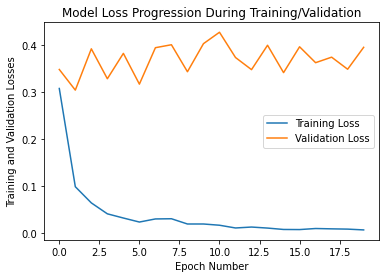

In [44]:
#plotting the graph
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])